In [ ]:
import jetnet
from jetnet.datasets import JetNet
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gen_metrics
from tqdm import tqdm
import pandas as pd
from IPython.display import Markdown, display
import pickle
import plotting
from typing import OrderedDict

plt.rcParams.update({"font.size": 16})


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

plot_dir = "../plots/jet_plots/Feb3"
_ = os.system(f"mkdir -p {plot_dir}")

data_dir = "../saved_data/"


## Distributions

In [ ]:
truth_jets_pf, _ = JetNet.getData(
    "g",
    data_dir="/Users/raghav/Documents/CERN/gen-models/MPGAN/datasets/",
    split_fraction=[1.0, 0, 0],
    particle_features=["etarel", "phirel", "ptrel"],
    jet_features=["pt", "eta", "mass", "num_particles"],
)


In [ ]:
# efps = jetnet.utils.efps(truth_jets_pf[:, :, :3], efpset_args=[("d<=", 4)])
# np.save("efps", efps)


In [ ]:
efps_true = np.load(f"{data_dir}/efps_true.npy")
pnet_activations_true = np.load(f"{data_dir}/pnet_activations_true.npy")


In [ ]:
from coffea.lookup_tools.dense_lookup import dense_lookup

mass = jetnet.utils.jet_features(truth_jets_pf[:, :, :3])["mass"]

np.random.seed(4)

bins = np.linspace(0, np.max(mass), 26)
true_mass_hist = np.histogram(mass, bins)[0]

smeared_hist = np.histogram(mass * np.random.normal(1, 0.25, size=mass.shape), bins)[0]
shifted_hist = np.histogram(mass * np.random.normal(1.1, 0.05, size=mass.shape), bins)[0]

smeared_lookup = dense_lookup(smeared_hist / true_mass_hist, bins)
shifted_lookup = dense_lookup(shifted_hist / true_mass_hist, bins)

smeared_weights = smeared_lookup(mass)
smeared_weights /= np.sum(smeared_weights)

shifted_weights = shifted_lookup(mass)
shifted_weights /= np.sum(shifted_weights)

tailcut_weights = (mass < 0.17).astype(float)
tailcut_weights /= np.sum(tailcut_weights)

dists = OrderedDict(
    [
        ("truth", (np.ones(truth_jets_pf.shape[0]) / truth_jets_pf.shape[0], "Truth")),
        ("smeared", (smeared_weights, "Smeared")),
        ("shifted", (shifted_weights, "Shifted")),
        ("tailcut", (tailcut_weights, "Removing tail")),
    ]
)


In [ ]:
# np.random.seed(4)

# pf_dists = OrderedDict()

# pf_dists["all_smeared"] = (
#     truth_jets_pf * np.random.normal(1, 0.25, size=truth_jets_pf.shape),
#     "Particle Features Smeared",
# )
# pf_dists["eta_smeared"] = (
#     np.concatenate(
#         (
#             truth_jets_pf[..., 0:1] * np.random.normal(1, 0.25, size=truth_jets_pf[..., 0:1].shape),
#             truth_jets_pf[..., 1:],
#         ),
#         axis=-1,
#     ),
#     r"Particle $\eta^{rel}$ Smeared",
# )
# pf_dists["pt_smeared"] = (
#     np.concatenate(
#         (
#             truth_jets_pf[..., :2],
#             truth_jets_pf[..., 2:3] * np.random.normal(1, 0.25, size=truth_jets_pf[..., 2:3].shape),
#         ),
#         axis=-1,
#     ),
#     r"Particle $p_T^{rel}$ Smeared",
# )
# pf_dists["pt_shifted"] = (
#     np.concatenate(
#         (
#             truth_jets_pf[..., :2],
#             truth_jets_pf[..., 2:3]
#             * np.random.normal(0.9, 0.1, size=truth_jets_pf[..., 2:3].shape),
#         ),
#         axis=-1,
#     ),
#     r"Particle $p_T^{rel}$ Shifted",
# )


In [ ]:
# with open("pf_dists.pkl", "wb") as f:
#     pickle.dump(pf_dists, f)


In [ ]:
# efps = {
#     key: jetnet.utils.efps(jets, efpset_args=[("d<=", 4)]) for key, (jets, _) in pf_dists.items()
# }
#
# with open("efps_dict.pkl", "wb") as f:
#     pickle.dump(efps, f)


In [ ]:
with open(f"{data_dir}/pf_dists.pkl", "rb") as f:
    pf_dists = pickle.load(f)

with open(f"{data_dir}/efps_dict.pkl", "rb") as f:
    efps = pickle.load(f)

pnet_activations = {}

for key in pf_dists:
    pnet_activations[key] = np.load(f"{data_dir}/pnet_activations_{key}.npy")

masses = {key: jetnet.utils.jet_features(jets)["mass"] for key, (jets, _) in pf_dists.items()}


In [ ]:
pf_dists["all_smeared"] = (pf_dists["all_smeared"][0], "Particle features smeared")
pf_dists["pt_smeared"] = (pf_dists["pt_smeared"][0], r"Particle $p_T^{rel}$ smeared")
pf_dists["pt_shifted"] = (pf_dists["pt_shifted"][0], r"Particle $p_T^{rel}$ shifted")
pf_dists["eta_smeared"] = (pf_dists["eta_smeared"][0], r"Particle $\eta^{rel}$ smeared")


## Plot Distributions

In [ ]:
np.arange(3).repeat(4)

In [ ]:
smeared_weights.repeat(30)

In [90]:
import seaborn as sns


sns.set(
    font_scale=2,
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "#141E27",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "#141E27",
        # "axes.spines.right": False,
        # "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "#141E27",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)

# # colours = ["#3F88C5", "#B3541E", "#990000", "#D00000", "#FF5B00", "#7CB518", "#064635", "#142F43"]


def plot_dists(true_feat_dist, pf_feat_dists, bins, feat_label, name, log = False, pf = False):
    fig, axes = plt.subplots(1, 2, figsize=(28, 12))

    colours = ["#3F88C5", "#990000", "#7CB518", "#FF5B00", "#142F43"]

    for ax in axes:
        _ = ax.hist(
            true_feat_dist if not pf else true_feat_dist.reshape(-1), bins, histtype="step", label="Truth", linewidth=4, density=True, color=colours[0]
        )
    
    for i, (weights, label) in enumerate(dists.values()):
        if label == "Truth":
            continue

        _ = axes[0].hist(
            true_feat_dist if not pf else true_feat_dist.reshape(-1),
            bins,
            weights=weights if not pf else weights.repeat(30),
            histtype="step",
            label=label,
            linewidth=2,
            linestyle="dashed",
            density=True,
            color=colours[i],
        )

    for i, (key, (_, label)) in enumerate(pf_dists.items()):
        _ = axes[1].hist(
            pf_feat_dists[key] if not pf else pf_feat_dists[key].reshape(-1),
            bins,
            histtype="step",
            label=label,
            linewidth=2,
            linestyle="dashed",
            density=True,
            color=colours[i + 1],
        )

    for ax in axes:
        ax.margins(x=0)
        ax.legend()
        ax.set_xlabel(feat_label)
        ax.set_ylabel("Probability (A.U.)")

        if log:
            ax.set_yscale('log')

    plt.savefig(f"{plot_dir}/jet_{name}_dists.pdf", bbox_inches="tight")

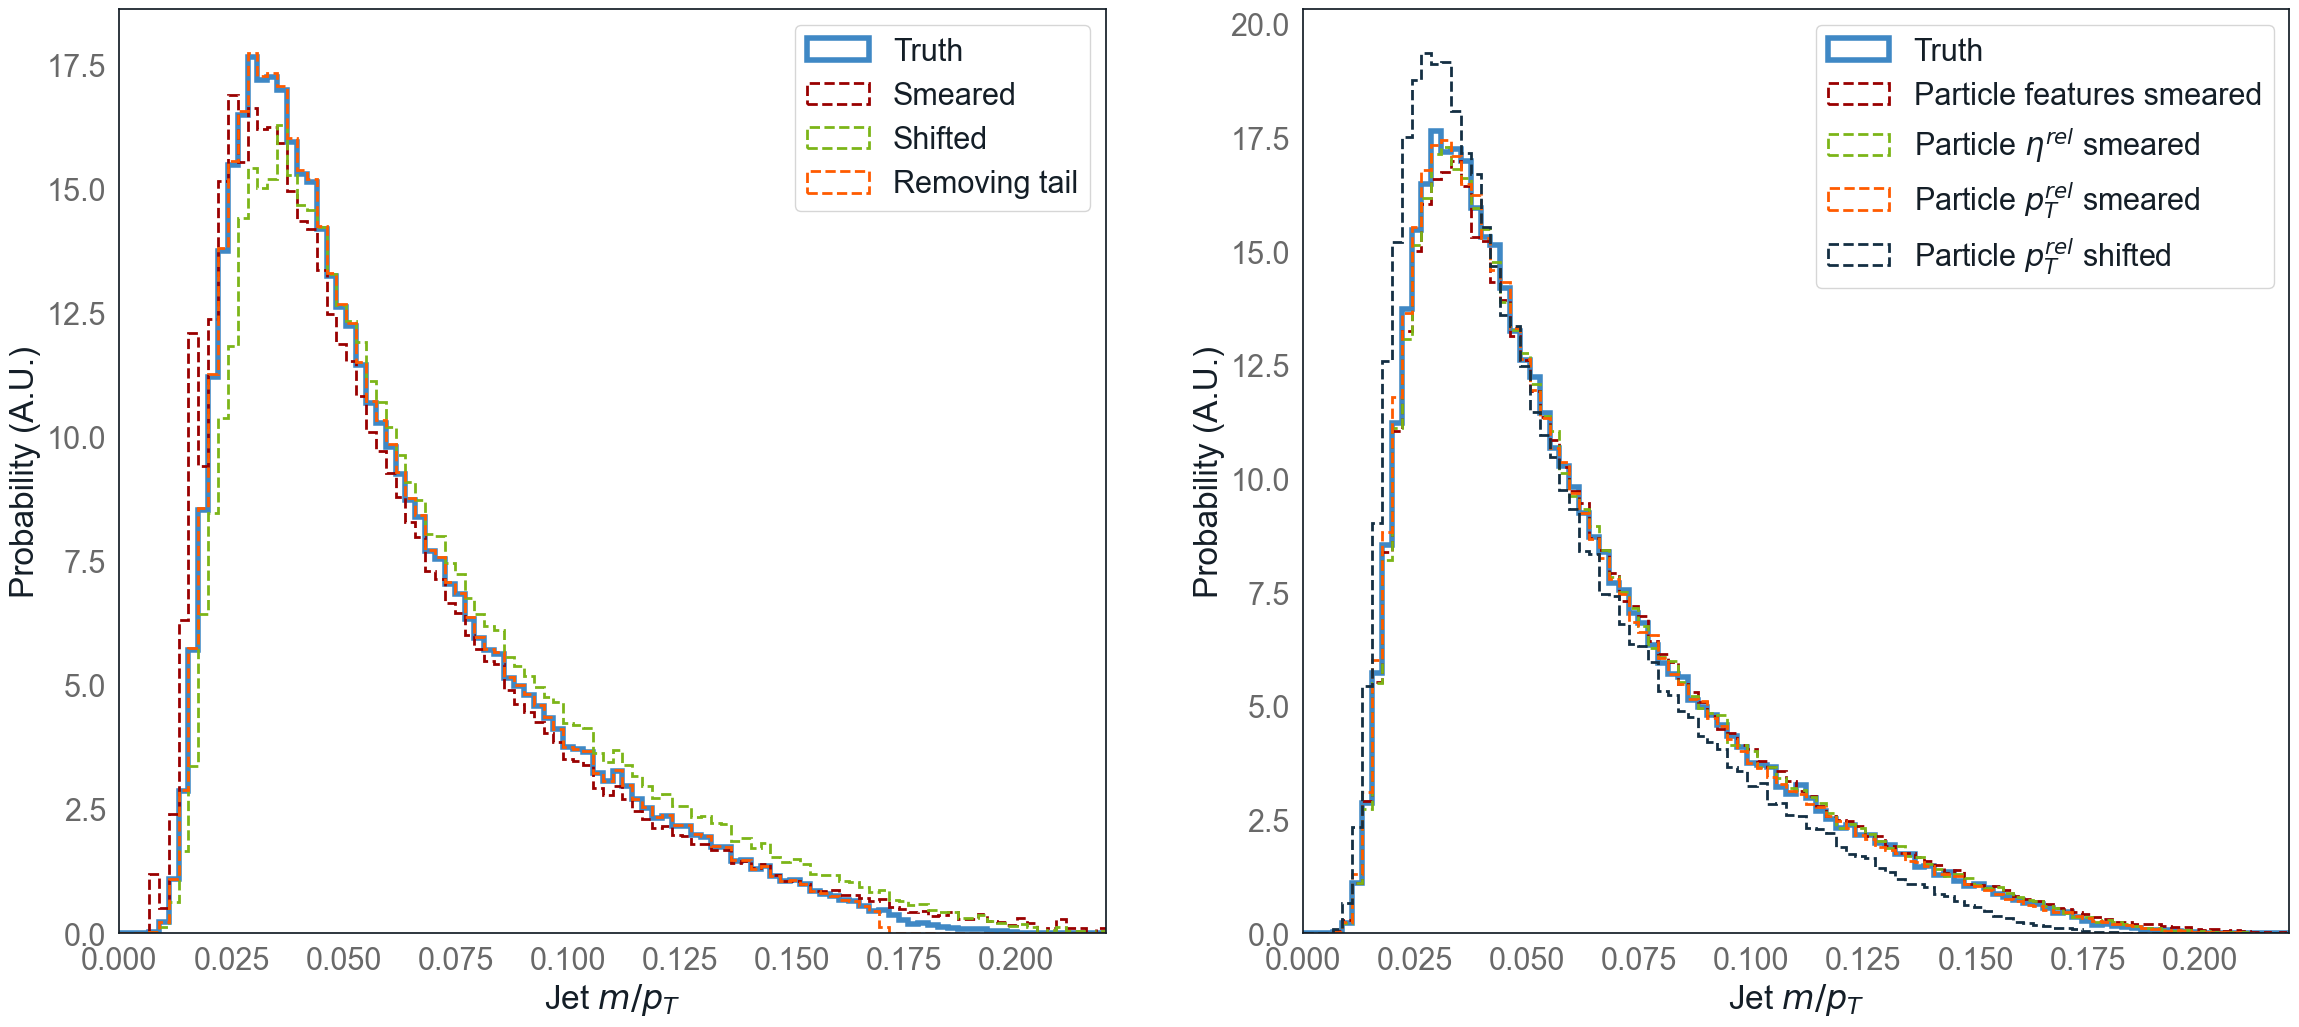

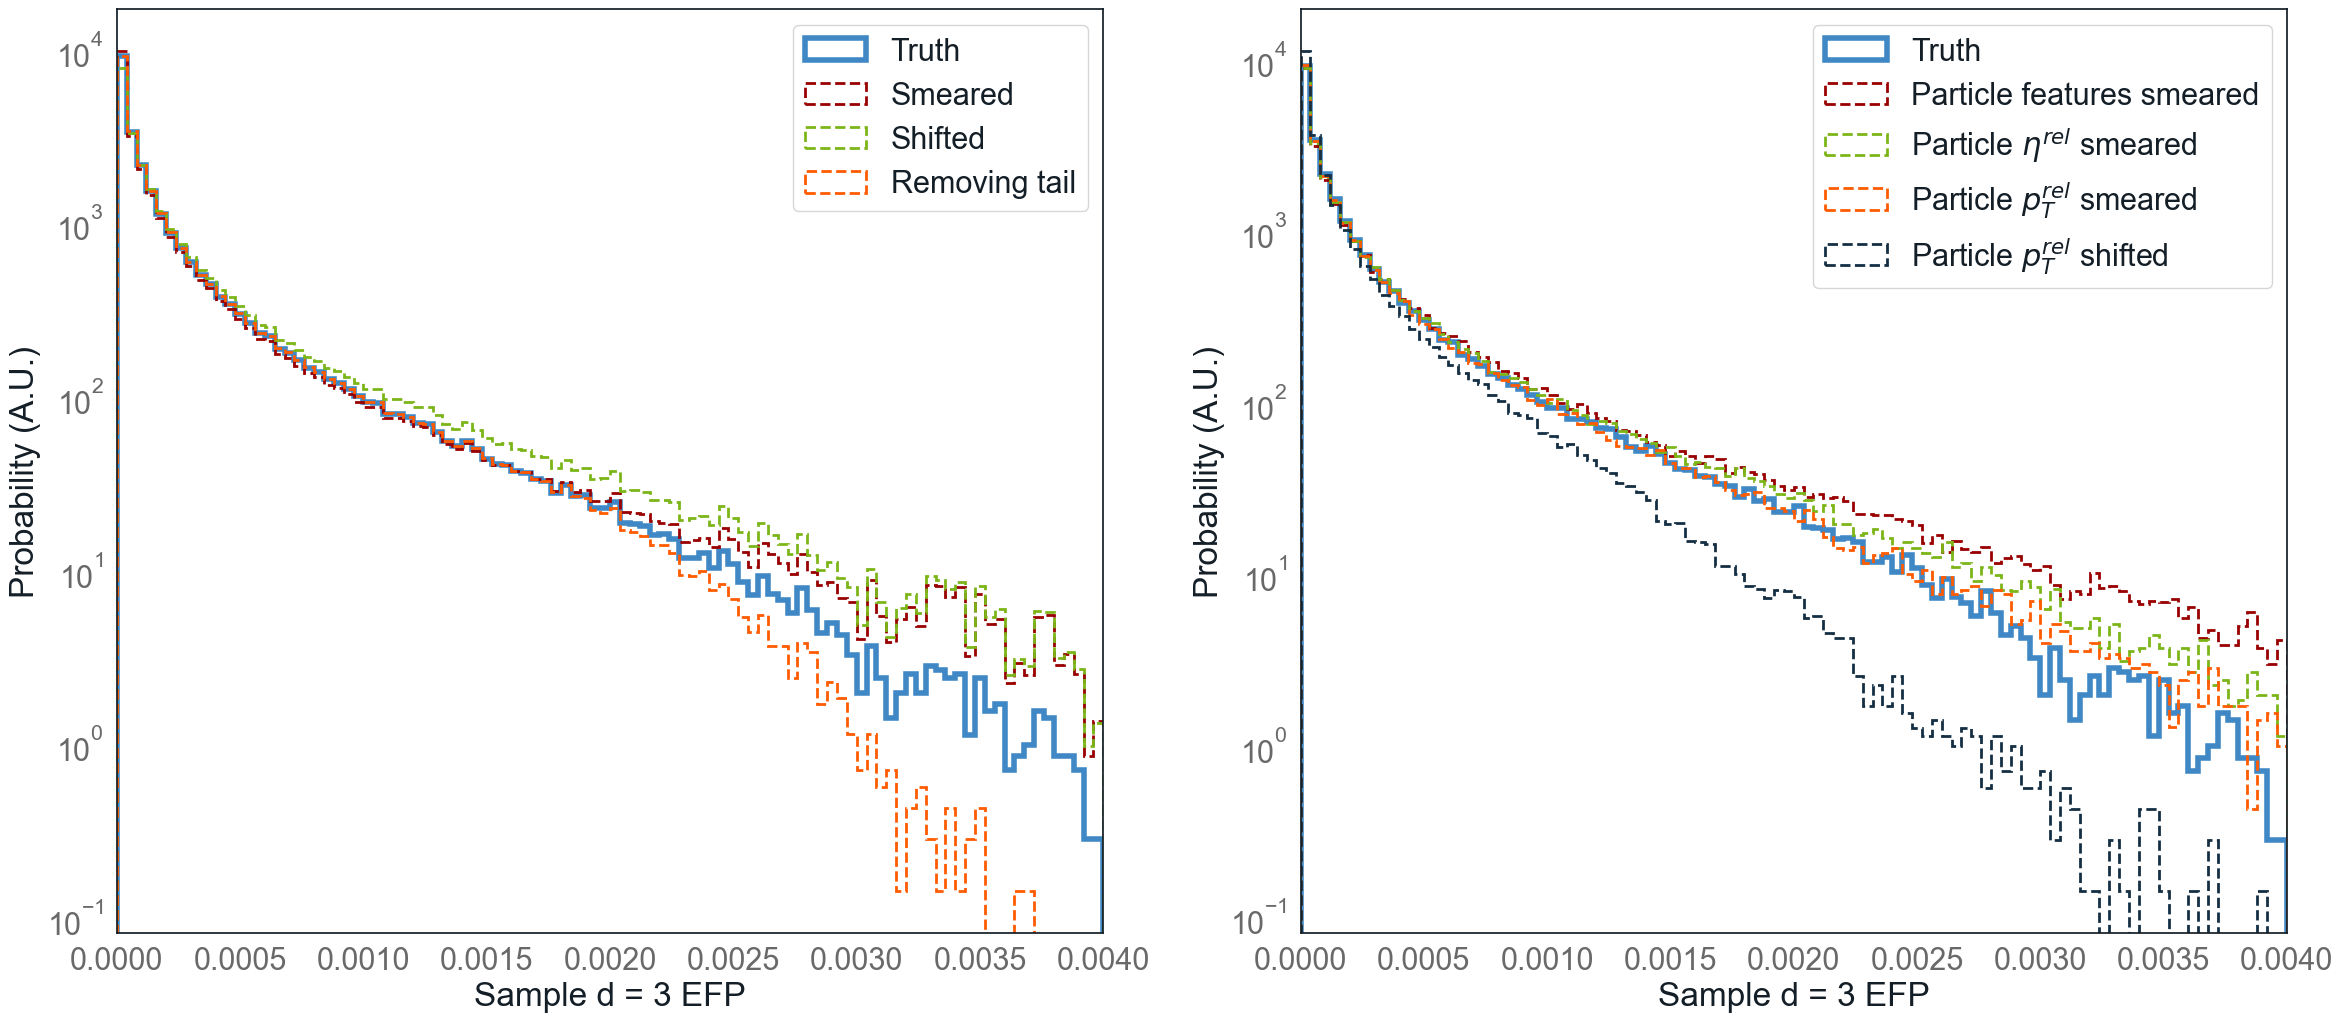

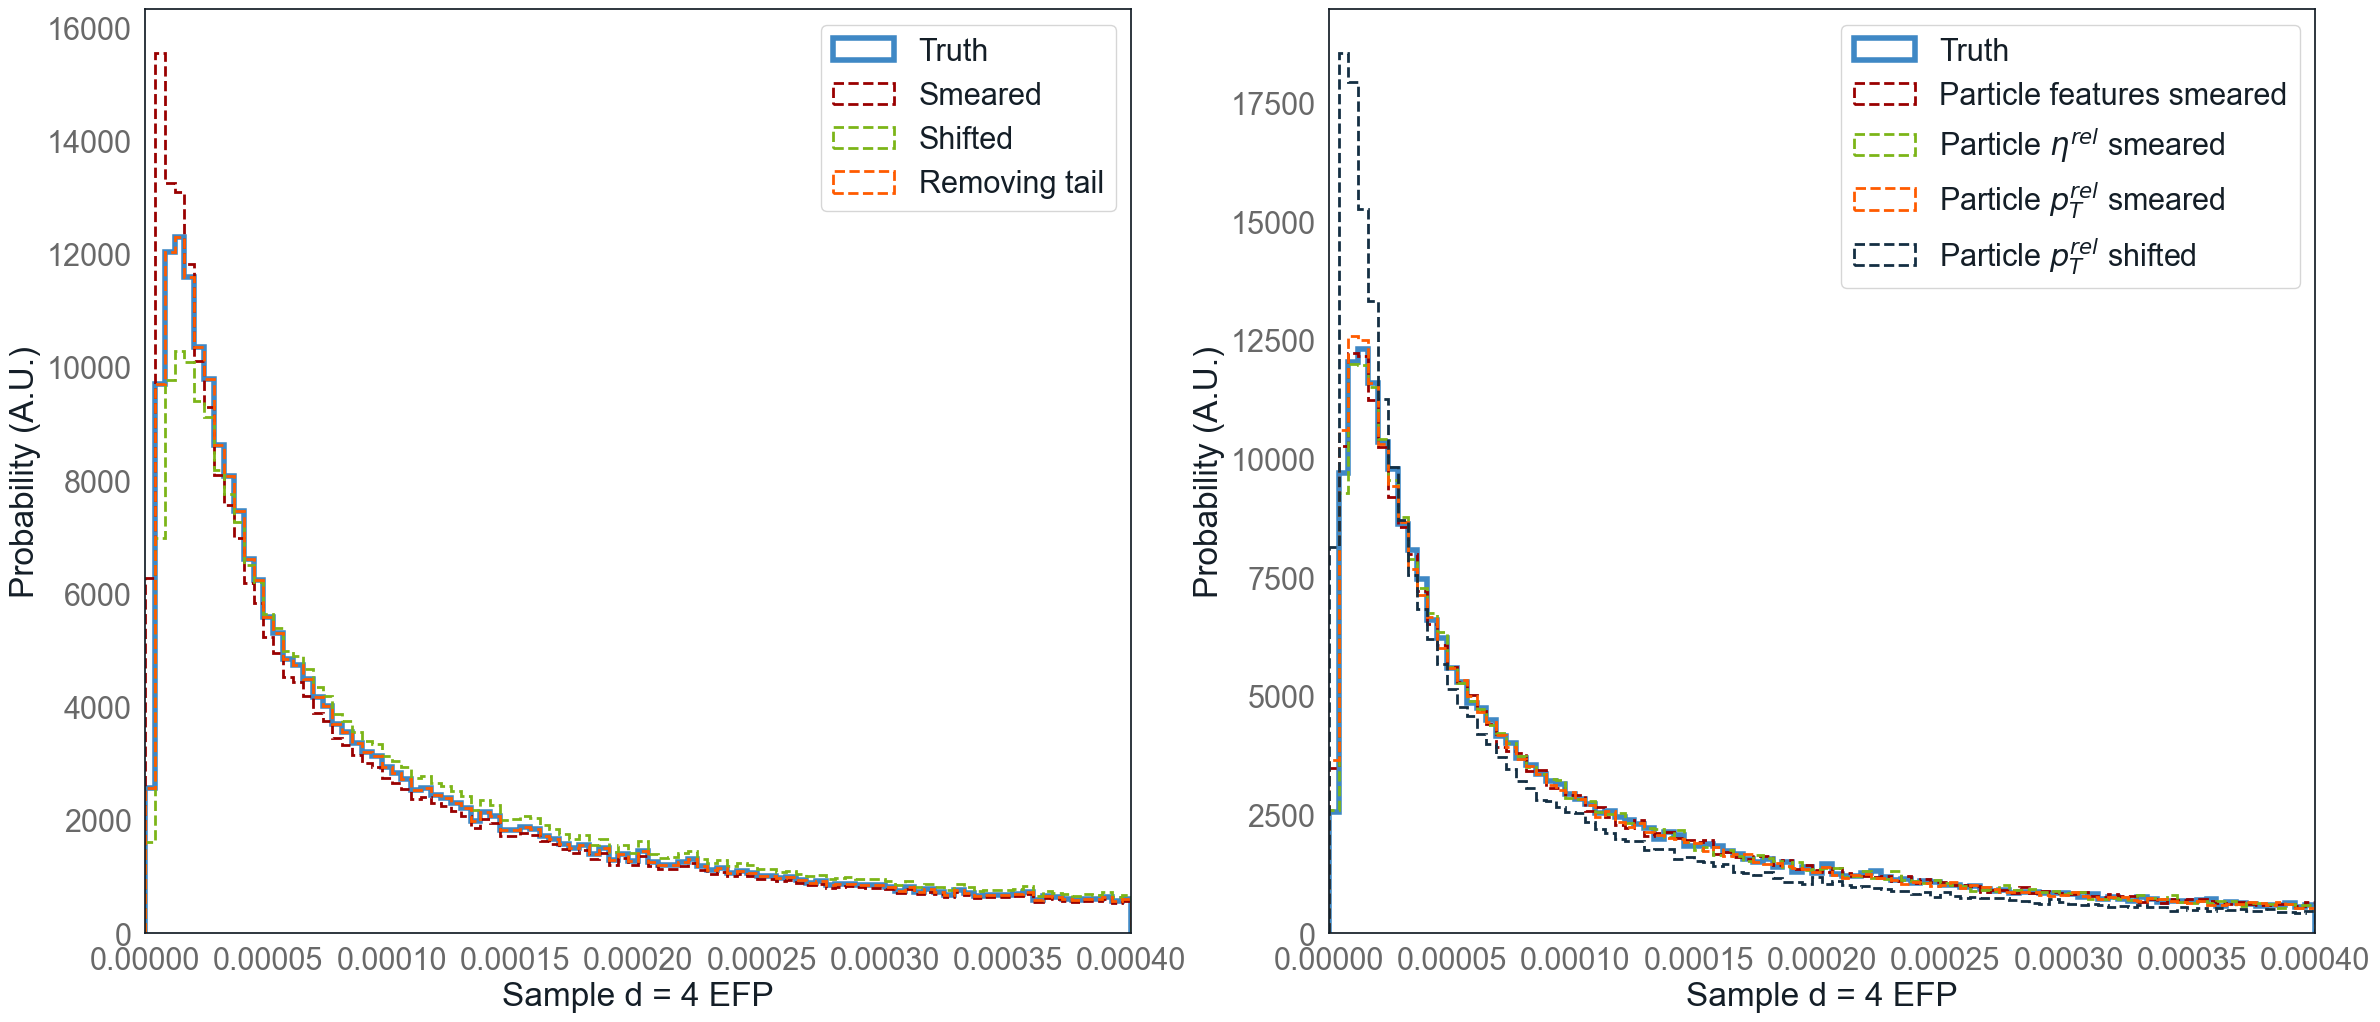

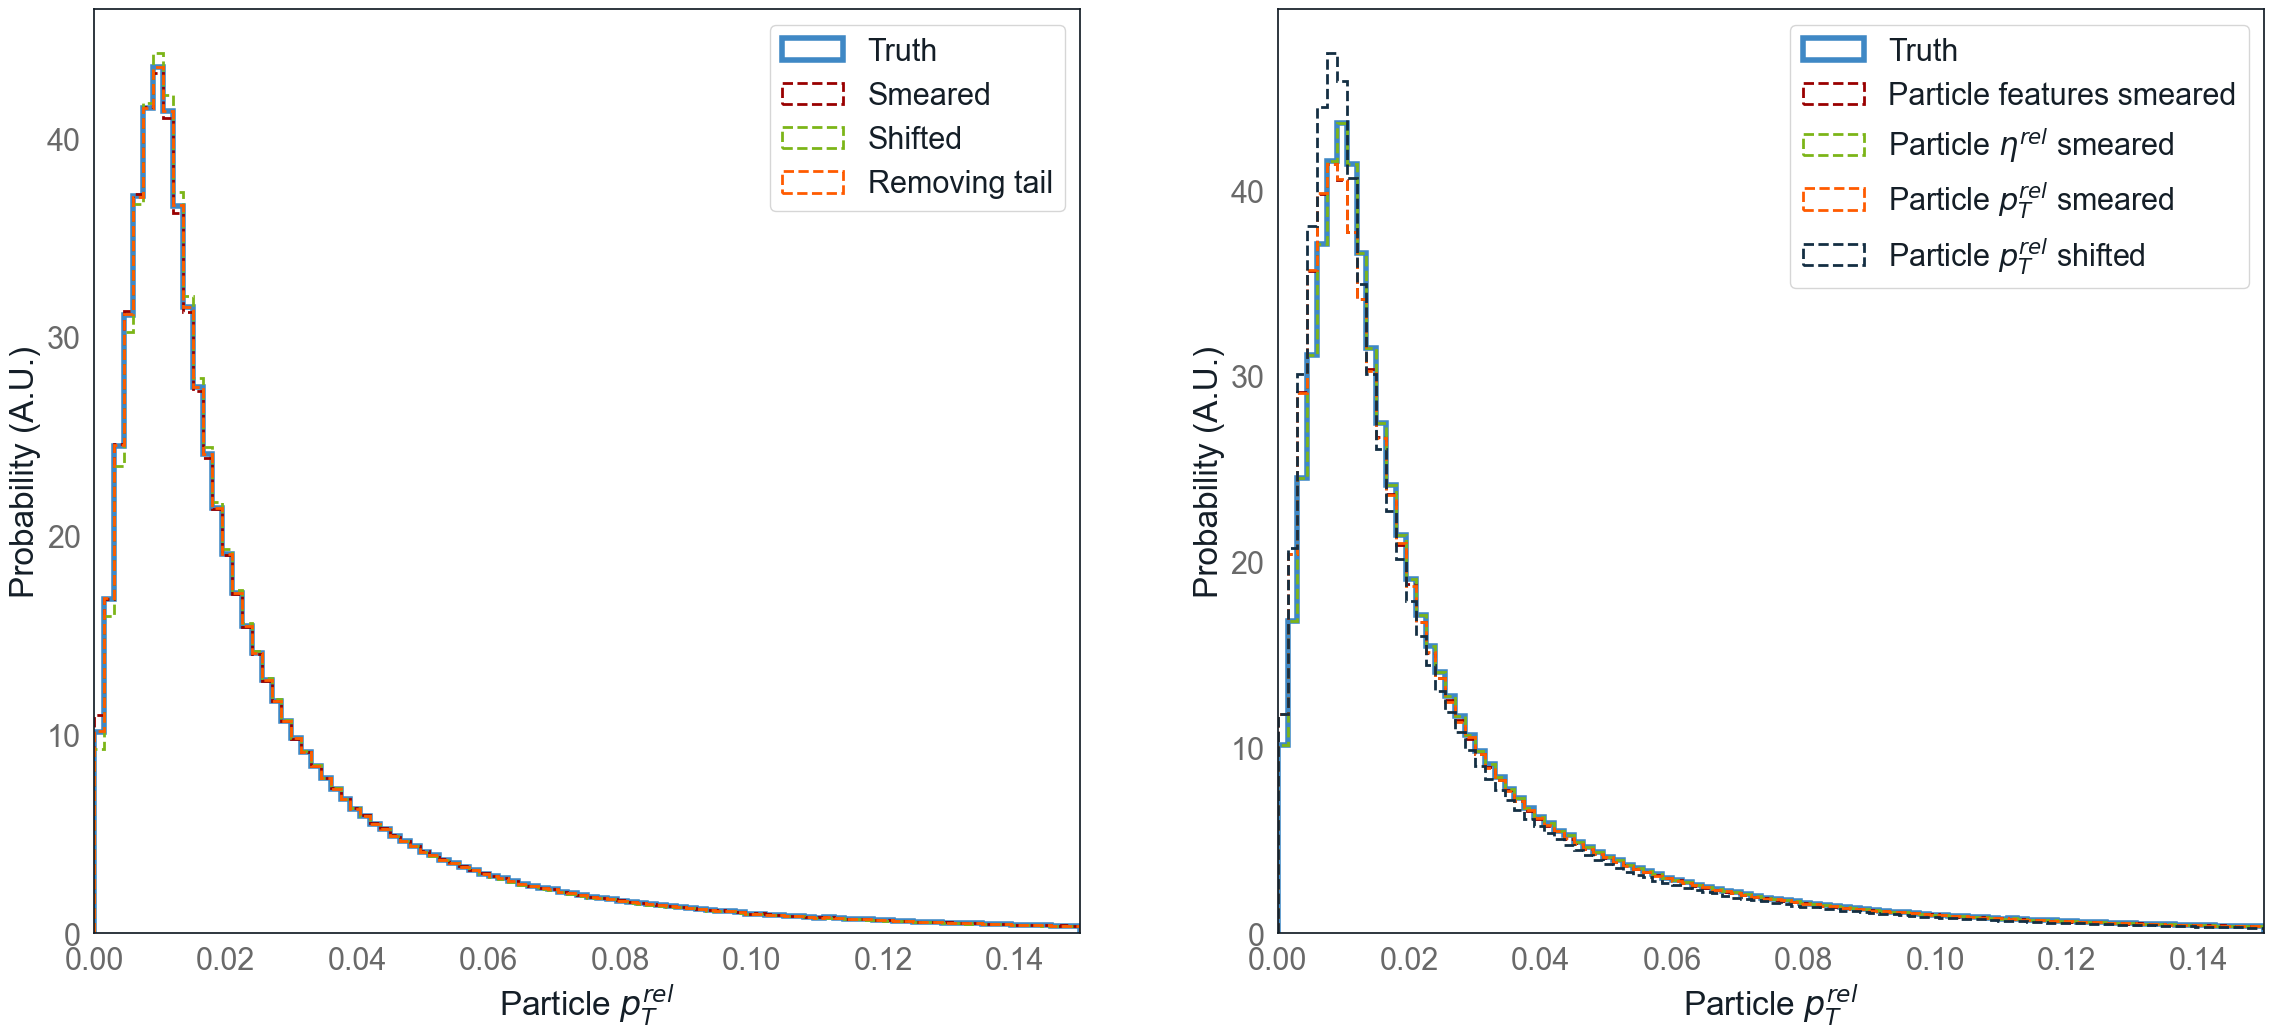

In [91]:
efp_index = 25
efp_index2 = 12

plot_params = [
    [mass, masses, np.linspace(0, 0.22, 101), r"Jet $m/p_T$", "mass"],
    [efps_true[:, efp_index2], {key: efps[key][:, efp_index2] for key in efps}, np.linspace(0, 0.004, 101), r"Sample d = 3 EFP", f"efp{efp_index2}", True],
    [efps_true[:, efp_index], {key: efps[key][:, efp_index] for key in efps}, np.linspace(0, 0.0004, 101), r"Sample d = 4 EFP", "efp25"],
    # [truth_jets_pf[:, :, 0], {key: pf_dists[key][0][:, :, 0] for key in efps}, np.linspace(-0.2, 0.2, 101), r"Particle $\eta^{rel}$", "parteta", False, True],
    [truth_jets_pf[:, :, 2], {key: pf_dists[key][0][:, :, 2] for key in efps}, np.linspace(0, 0.15, 101), r"Particle $p_T^{rel}$", "partpt", False, True],
]

for params in plot_params:
    plot_dists(*params)

In [ ]:
plt.figure(figsize=(12, 12))

bins = np.linspace(0, 0.01, 101)
# bins = np.linspace(0, 0.25, 101)
efp_index = 25

_ = plt.hist(
    efps_true[:, efp_index], bins, histtype="step", label="Truth", linewidth=3, density=True
)
for weights, label in dists.values():
    if label == "Truth":
        continue

    _ = plt.hist(
        efps_true[:, efp_index],
        bins,
        weights=weights,
        histtype="step",
        label=label,
        linewidth=2,
        linestyle="dashed",
        density=True,
    )
for key, (_, label) in pf_dists.items():
    _ = plt.hist(
        efps[key][:, efp_index],
        bins,
        histtype="step",
        label=label,
        linewidth=2,
        linestyle="dashed",
        density=True,
    )
plt.legend()
plt.xlabel(r"Jet $m/p_T$")
plt.ylabel("Normalized # of Jets")
plt.yscale('log')
plt.savefig(f"{plot_dir}/jet_dists_efp.pdf", bbox_inches="tight")


## Measurements

In [ ]:
num_samples = 150_000
sample_efps = OrderedDict()
sample_acts = OrderedDict()
sample_masses = OrderedDict()

np.random.seed(4)
true_inds = np.random.choice(np.arange(truth_jets_pf.shape[0]), num_samples)
true_mass = mass[true_inds]
true_efps = efps_true[true_inds]
true_acts = pnet_activations_true[true_inds]

for key, (weights, _) in dists.items():
    inds = np.random.choice(np.arange(truth_jets_pf.shape[0]), num_samples, p=weights)
    sample_masses[key] = mass[inds]
    sample_efps[key] = efps_true[inds]
    sample_acts[key] = pnet_activations_true[inds]
    # np.save(f"../distorted_jets/{key}.npy", truth_jets_pf[inds])

for key in pf_dists:
    inds = np.random.choice(np.arange(truth_jets_pf.shape[0]), num_samples)
    sample_masses[key] = masses[key][inds]
    sample_efps[key] = efps[key][inds]
    sample_acts[key] = pnet_activations[key][inds]
    # np.save(f"../distorted_jets/{key}.npy", pf_dists[key][0])


In [ ]:
# with open(f"{data_dir}/sample_efps.pkl", 'wb') as f:
#     pickle.dump(sample_efps, f)


In [ ]:
num_batches = 5

batch_sizes = {
    "w1m": [
        100,
        200,
        300,
        500,
        750,
        1000,
        1500,
        2000,
        3000,
        5000,
        7500,
        10000,
        15000,
        20000,
        25000,
        30000,
        40000,
        50000,
    ],
    "wasserstein": [100, 200, 300, 500, 750, 1000, 1500, 2000],
    "fgd": [
        100,
        200,
        300,
        500,
        750,
        1000,
        1500,
        2000,
        3000,
        5000,
        7500,
        10000,
        15000,
        20000,
        25000,
        30000,
        40000,
        50000,
    ],
    "fgd_inf": [25_000, 30_000, 40_000, 50_000],
    "mmdup4": [100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    "pr": [100, 200, 300, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
}

metrics = OrderedDict(
    [
        ("wasserstein", (gen_metrics.wasserstein, {"normalise": False}, "Wasserstein")),
        ("fgd", (gen_metrics.frechet_gaussian_distance, {}, "Fréchet Gaussian Distance")),
        ("fgd_inf", (gen_metrics.frechet_gaussian_distance, {}, r"$\mathrm{FGD}_{\infty}$")),
        (
            "mmdup4",
            (
                gen_metrics.mmd_poly_quadratic_unbiased,
                {"degree": 4},
                "MMD",
            ),
        ),
        ("pr", (gen_metrics.pr, {}, ["Precision", "Recall"])),
    ]
)


In [ ]:
measurements_dir = "../plots/jet_plots/Nov11"

with open(f"{measurements_dir}/measurements_w1m.pkl", "rb") as f:
    measurements_w1m = pickle.load(f)

with open(f"{measurements_dir}/measurements_efps.pkl", "rb") as f:
    measurements_efps = pickle.load(f)

with open(f"{measurements_dir}/measurements_acts.pkl", "rb") as f:
    measurements_acts = pickle.load(f)


### W1m

In [ ]:
measurements_w1m = OrderedDict()
mkey = "w1m"

for dkey in sample_masses:
    ms = []
    ts = []
    for batch_size in tqdm(batch_sizes[mkey], desc=mkey):
        mean_std, timing = gen_metrics.multi_batch_evaluation(
            true_mass,
            sample_masses[dkey],
            num_batches,
            batch_size,
            gen_metrics.wasserstein1d,
            timing=True,
            normalise=False,
        )
        ms.append(mean_std)
        ts.append(timing)

    measurements_w1m[dkey] = {"mean_std": np.array(ms), "timing": np.array(ts)}


### EFPs

In [ ]:
if "measurements_efps" not in locals():
    measurements_efps = OrderedDict()

for dkey in sample_efps:
    print(dkey)
    if dkey not in measurements_efps:
        measurements_efps[dkey] = OrderedDict()

    for mkey, (metric, metric_args, label) in metrics.items():
        if (mkey in measurements_efps[dkey] or mkey == "fgd_inf") and not mkey == "mmdup4":
            continue

        ms = []
        ts = []

        # ms = list(measurements_efps[dkey][mkey]["mean_std"])
        # ts = list(measurements_efps[dkey][mkey]["timing"])

        for batch_size in tqdm(batch_sizes[mkey][len(ms) :], desc=mkey):
            # mean_std, timing = gen_metrics.multi_batch_evaluation(
            #     true_efps,
            #     sample_efps[dkey],
            #     num_batches,
            #     batch_size,
            #     metric,
            #     timing=True,
            #     **metric_args
            # )
            # ms.append(mean_std)
            # ts.append(timing)

            mean_std = gen_metrics.multi_batch_evaluation_mmd(
                true_efps,
                sample_efps[dkey],
                num_batches,
                batch_size,
            )
            ms.append(mean_std)
            ts.append(0)

        measurements_efps[dkey][mkey] = {"mean_std": np.array(ms), "timing": np.array(ts)}


#### FGD Infinity

In [ ]:
mkey = "fgd_inf"

for dkey in sample_efps:
    ms = []
    ts = []
    for n in tqdm(batch_sizes[mkey], desc=dkey):
        mean_std, timing = gen_metrics.one_over_n_extrapolation_repeated_measurements(true_efps, sample_efps[dkey], normalise=True, max_samples=n, timing=True)
        ms.append(mean_std)
        ts.append(timing)

    measurements_efps[dkey][mkey] = {"mean_std": np.array(ms), "timing": np.array(ts)}
    

### ParticleNet Activations

In [ ]:
if "measurements_acts" not in locals():
    measurements_acts = OrderedDict()

for dkey in sample_acts:
    print(dkey)
    if dkey not in measurements_acts:
        measurements_acts[dkey] = OrderedDict()

    for mkey, (metric, metric_args, label) in metrics.items():
        if (mkey in measurements_acts[dkey] or mkey == "fgd_inf") and not mkey == "mmdup4":
            continue

        ms = []
        ts = []

        # ms = list(measurements_acts[dkey][mkey]["mean_std"])[:-2]
        # ts = list(measurements_acts[dkey][mkey]["timing"])[:-2]

        for batch_size in tqdm(batch_sizes[mkey][len(ms) :], desc=mkey):
            # mean_std, timing = gen_metrics.multi_batch_evaluation(
            #     true_acts,
            #     sample_acts[dkey],
            #     num_batches,
            #     batch_size,
            #     metric,
            #     timing=True,
            #     **metric_args,
            #     normalise=False
            # )
            # ms.append(mean_std)
            # ts.append(timing)

            mean_std = gen_metrics.multi_batch_evaluation_mmd(
                true_acts,
                sample_acts[dkey],
                num_batches,
                batch_size,
                normalise=False,
            )
            ms.append(mean_std)
            ts.append(0)

        measurements_acts[dkey][mkey] = {"mean_std": np.array(ms), "timing": np.array(ts)}


#### FGD Infinity

In [ ]:
mkey = "fgd_inf"

for dkey in sample_acts:
    ms = []
    ts = []
    for n in tqdm(batch_sizes[mkey], desc=dkey):
        mean_std, timing = gen_metrics.one_over_n_extrapolation_repeated_measurements(true_acts, sample_acts[dkey], normalise=True, max_samples=n, timing=True)
        ms.append(mean_std)
        ts.append(timing)

    measurements_acts[dkey][mkey] = {"mean_std": np.array(ms), "timing": np.array(ts)}
    

In [ ]:
with open(f"{plot_dir}/measurements_w1m.pkl", "wb") as f:
    pickle.dump(measurements_w1m, f)

with open(f"{plot_dir}/measurements_efps.pkl", "wb") as f:
    pickle.dump(measurements_efps, f)

with open(f"{plot_dir}/measurements_acts.pkl", "wb") as f:
    pickle.dump(measurements_acts, f)


In [ ]:
# for vals in measurements_acts.values():
#     vals["mmdup4"]['mean_std'][:, 1] /= 2


## Plot Measurements

In [ ]:
plt.rcParams.update({"font.size": 24})
matplotlib.rc_file_defaults()

ylims = OrderedDict(
    [
        (
            "w1m",
            (
                [0, 0.04],
                [0, 0.05],
                [0, 0.06],
                [0, 0.05],
                [0, 0.05],
                [0, 0.05],
                [0, 0.05],
                [0, 0.05],
            ),
        ),
        ("wasserstein", ([0, 0.25], [0, 1], [0, 1], [0, 0.5], [0, 2], [0, 1], [0, 1], [0, 0.5])),
        # (
        #     "fgd",
        #     ([0, 0.25], [0, 0.5], [0, 1], [0, 0.1], [0, 0.25], [0, 0.25], [0, 0.15], [0, 0.25]),
        # ),
        (
            "fgd_inf",
            (
                [0, 0.0002],
                [0, 0.1],
                [0, 0.1],
                [0, 0.01],
                [0, 0.05],
                [-0.01, 0.01],
                [-0.01, 0.01],
                [-0.1, 0.1],
            ),
        ),
        (
            "mmdup4",
            (
                [-0.0002, 0.0002],
                [-0.001, 0.001],
                [-0.001, 0.003],
                [-0.0002, 0.0002],
                [-0.001, 0.001],
                [-0.0002, 0.0002],
                [-0.0002, 0.0002],
                [0, 0.005],
            ),
        ),
        (
            "precision",
            ([0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1]),
        ),
        (
            "recall",
            ([0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1]),
        ),
    ]
)

fig, axes = plt.subplots(
    nrows=len(ylims),
    ncols=len(dists | pf_dists),
    figsize=(len(dists | pf_dists) * 10, len(ylims) * 8),
    gridspec_kw={"wspace": 0.25},
)

i = 0
mkey = "w1m"
plotting.metric_label(axes[i][0], r"$W_1^M$")
for j, (dkey, (_, label)) in enumerate((dists | pf_dists).items()):
    axes[i][j].set_title(label)
    plotting.plot_means_stds(
        axes[i][j], measurements_w1m[dkey]["mean_std"], batch_sizes[mkey], ylims[mkey][j]
    )

for (mkey, (metric, metric_args, label)) in metrics.items():
    if mkey in ["dc", "pr"] or mkey not in ylims:
        continue

    i = list(ylims.keys()).index(mkey)

    plotting.metric_label(axes[i][0], label)
    for j, (dkey, (_, label)) in enumerate((dists | pf_dists).items()):
        if i == 0:
            axes[i][j].set_title(label)

        plotting.plot_means_stds(
            axes[i][j], measurements_efps[dkey][mkey]["mean_std"], batch_sizes[mkey], ylims[mkey][j]
        )

for k, key in enumerate(["precision", "recall"]):
    i = len(ylims) - 2 + k
    mkey = "pr"

    plotting.metric_label(axes[i][0], metrics[mkey][2][k])
    for j, dkey in enumerate(dists | pf_dists):
        plotting.plot_means_stds(
            axes[i][j],
            measurements_efps[dkey][mkey]["mean_std"][:, :, k],
            batch_sizes[mkey],
            ylims[key][j],
        )


plt.savefig(f"{plot_dir}/efps_scores.pdf", bbox_inches="tight")


In [ ]:
plt.rcParams.update({"font.size": 16})

ylims = OrderedDict(
    [
        ("wasserstein", ([0, 10], [0, 10], [0, 10], [0, 10], [0, 15], [0, 10], [0, 15], [0, 25])),
        # ("fgd", ([0, 2], [0, 2], [0, 2], [0, 2], [0, 5], [0, 2], [0, 8], [0, 10])),
        (
            "fgd_inf",
            ([0, 0.01], [0, 0.25], [0, 1], [-0.02, 0.02], [0, 4], [-0.01, 0.2], [0, 4], [0, 8]),
        ),
        (
            "mmdup4",
            (
                [-0.02, 0.02],
                [-0.1, 0.1],
                [-0.2, 0.2],
                [-0.1, 0.1],
                [0, 1],
                [-0.1, 0.1],
                [0, 1],
                [0, 2],
            ),
        ),
        (
            "precision",
            ([0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1]),
        ),
        (
            "recall",
            ([0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1], [0, 1.1]),
        ),
    ]
)

fig, axes = plt.subplots(
    nrows=len(ylims),
    ncols=len(dists | pf_dists),
    figsize=(len(dists | pf_dists) * 10, len(ylims) * 8),
    gridspec_kw={"wspace": 0.25},
)

for (mkey, (metric, metric_args, label)) in metrics.items():
    if mkey in ["dc", "pr"] or mkey not in ylims:
        continue

    i = list(ylims.keys()).index(mkey)

    plotting.metric_label(axes[i][0], label)
    for j, (dkey, (_, label)) in enumerate((dists | pf_dists).items()):
        if i == 0:
            axes[i][j].set_title(label)

        plotting.plot_means_stds(
            axes[i][j], measurements_acts[dkey][mkey]["mean_std"], batch_sizes[mkey], ylims[mkey][j]
        )

for k, key in enumerate(["precision", "recall"]):
    i = len(ylims) - 2 + k
    mkey = "pr"

    plotting.metric_label(axes[i][0], metrics[mkey][2][k])
    for j, dkey in enumerate(dists | pf_dists):
        plotting.plot_means_stds(
            axes[i][j],
            measurements_acts[dkey][mkey]["mean_std"][:, :, k],
            batch_sizes[mkey],
            ylims[key][j],
        )

plt.savefig(f"{plot_dir}/acts_scores.pdf", bbox_inches="tight")


# Table of values

In [ ]:
def format_mean_std(mean_stds: np.ndarray):
    mean, sd = mean_stds
    sd = np.abs(sd)

    if sd == 0:
        return f"${mean:.1f} \\pm 0.0$"

    """round mean and standard deviation to most significant digit of sd and apply latex formatting"""
    decimals = -int(np.floor(np.log10(sd)))
    decimals -= int((sd * 10**decimals) >= 9.5)
    decimals = min(decimals, 3)

    if decimals < 0:
        ten_to = 10 ** (-decimals)
        if mean > ten_to:
            mean = ten_to * (mean // ten_to)
        else:
            mean_ten_to = 10 ** np.floor(np.log10(mean))
            mean = mean_ten_to * (mean // mean_ten_to)
        sd = ten_to * (sd // ten_to)
        decimals = 0

    if mean >= 1e3 and sd >= 1e3:
        mean = np.round(mean * 1e-3)
        sd = np.round(sd * 1e-3)
        return f"${mean:.{decimals}f}$k $\\pm {sd:.{decimals}f}$k"
    else:
        return f"${mean:.{decimals}f} \\pm {sd:.{decimals}f}$"


In [ ]:
def print_mean_std(mean_stds: np.ndarray):
    return f"{mean_stds[0]:.3f} ± {mean_stds[1]:.3f}"


rows = []
sigs = []  # keeping track of significances

row = [r"$W_1^M \times 10^3$"]
sigrow = ["\quad\quad Sign.", "---"]
sig = []
true_mean, true_std = measurements_w1m["truth"]["mean_std"][-1]
for dkey, values in measurements_w1m.items():
    row.append(format_mean_std(values["mean_std"][-1, :] * 1e3))

    sigv = (values["mean_std"][-1, 0] - true_mean) / true_std
    sigerr = values["mean_std"][-1, 1] * sigv / values["mean_std"][-1, 0]
    sig.append(sigv)

    if dkey != "truth":
        sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

rows.append(row)
rows.append(sigrow)
sigs.append(sig)


for mkey, (metric, metric_args, label) in metrics.items():
    if mkey == "fgd":
        continue

    if isinstance(label, list):
        for i, l in enumerate(label):
            row = [l + " EFP"]
            sigrow = ["\quad\quad Sign.", "---"]
            sig = []

            true_mean, true_std = measurements_efps["truth"][mkey]["mean_std"][-1, :, i]
            for dkey, values in measurements_efps.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :, i]))
                sigv = -(values[mkey]["mean_std"][-1, 0, i] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1, i] * sigv / values[mkey]["mean_std"][-1, 0, i]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

            rows.append(row)
            rows.append(sigrow)
            sigs.append(sig)
        # continue
    else:
        sigrow = ["\quad\quad Sign.", "---"]
        sig = []
        true_mean, true_std = measurements_efps["truth"][mkey]["mean_std"][-1]

        if mkey in ["fgd_inf", "mmdup4"]:
            row = [f"{label} EFP $\\times 10^3$"]

            for dkey, values in measurements_efps.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :] * 1e3))
                sigv = (values[mkey]["mean_std"][-1, 0] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1] * sigv / values[mkey]["mean_std"][-1, 0]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

        else:
            row = [label + " EFP"]

            for dkey, values in measurements_efps.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :]))
                sigv = (values[mkey]["mean_std"][-1, 0] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1] * sigv / values[mkey]["mean_std"][-1, 0]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

        rows.append(row)
        rows.append(sigrow)
        sigs.append(sig)

for mkey, (metric, metric_args, label) in metrics.items():
    if mkey == "fgd":
        continue

    if isinstance(label, list):
        for i, l in enumerate(label):
            row = [l + " PN"]
            sigrow = ["\quad\quad Sign.", "---"]
            sig = []

            true_mean, true_std = measurements_acts["truth"][mkey]["mean_std"][-1, :, i]

            for dkey, values in measurements_acts.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :, i]))
                sigv = -(values[mkey]["mean_std"][-1, 0, i] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1, i] * sigv / values[mkey]["mean_std"][-1, 0, i]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

            rows.append(row)
            rows.append(sigrow)
            sigs.append(sig)
    else:
        sigrow = ["\quad\quad Sign.", "---"]
        sig = []
        true_mean, true_std = measurements_acts["truth"][mkey]["mean_std"][-1]

        if mkey in ["fgd_inf", "mmdup4"]:
            row = [f"{label} PN $\\times 10^3$"]

            for dkey, values in measurements_acts.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :] * 1e3))
                sigv = (values[mkey]["mean_std"][-1, 0] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1] * sigv / values[mkey]["mean_std"][-1, 0]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

        else:
            row = [label + " PN"]

            for dkey, values in measurements_acts.items():
                row.append(format_mean_std(values[mkey]["mean_std"][-1, :]))
                sigv = (values[mkey]["mean_std"][-1, 0] - true_mean) / true_std
                sigerr = values[mkey]["mean_std"][-1, 1] * sigv / values[mkey]["mean_std"][-1, 0]
                sig.append(sigv)

                if dkey != "truth":
                    sigrow.append(format_mean_std([sigv, sigerr]) if sigv > 0 else "0")

        rows.append(row)
        rows.append(sigrow)
        sigs.append(sig)

# https://graphgan.nrp-nautilus.io/hep-generative-metrics/classifier_trainings/
pnet_aucs = [
    0.5009051928,
    0.5245543864000001,
    0.5431707766,
    0.5030471778,
    0.9721441670000002,
    0.8120980804,
    0.934389781,
    0.9887714117999998,
]
rows.append(["Classifier LLF AUC"] + [f"{auc:.2f}" for auc in pnet_aucs])

hlf_aucs = [
    0.5022573634,
    0.5290901156,
    0.5455009230000001,
    0.5046839426,
    0.8391819958,
    0.6390696834,
    0.7389946514000001,
    0.9174882015999999,
]
rows.append(["Classifier HLF AUC"] + [f"{auc:.2f}" for auc in hlf_aucs])

sigs = np.array(sigs)
max_sigs = np.argmax(sigs, axis=0)

for i, midx in enumerate(max_sigs[1:]):
    rows[midx * 2][i + 2] = r"$\mathbf{" + rows[midx * 2][i + 2][1:-1] + r"}$"
    rows[midx * 2 + 1][i + 2] = r"$\mathbf{" + rows[midx * 2 + 1][i + 2][1:-1] + r"}$"


textable = [
    " & ".join(["Metric"] + list(np.array(list((dists | pf_dists).values()), dtype=object)[:, 1]))
    + "\\\\\n"
] + [" & ".join(row) + "\\\\\n" for row in rows]

for i in range(2, len(textable) - 2, 2):
    textable[i] = textable[i][:-1] + " \midrule \n"

textable[-1] = textable[-1][:-3]

with open(f"{plot_dir}/measurements.tex", "w") as f:
    f.writelines(textable)


results = pd.DataFrame(
    rows, columns=["Metric"] + list(np.array(list((dists | pf_dists).values()), dtype=object)[:, 1])
)

display(Markdown(results.to_markdown()))
